# Final Project - Predict the duration of a tennis match

## A. Data Acquisition

In [9]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)

In [10]:
df20=pd.read_csv(r'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2020.csv')
df19=pd.read_csv(r'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2019.csv')
df18=pd.read_csv(r'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2018.csv')
df17=pd.read_csv(r'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2017.csv')
df16=pd.read_csv(r'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2016.csv')
df15=pd.read_csv(r'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2015.csv')

Dt=[df20,df19,df18,df17,df16,df15]
Df=pd.concat(Dt, axis=0, ignore_index=True)
Df.head(2)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2020-8888,Atp Cup,Hard,24,A,20200106,300,104925,NaN,NaN,Novak Djokovic,R,188.0,SRB,32.626968,104745,NaN,NaN,Rafael Nadal,L,185.0,ESP,33.593429,6-2 7-6(4),3,F,115.0,12.0,2.0,64.0,49.0,41.0,9.0,10.0,5.0,5.0,5.0,3.0,70.0,51.0,39.0,6.0,10.0,6.0,8.0,2.0,9055.0,1.0,9985.0
1,2020-8888,Atp Cup,Hard,24,A,20200106,299,105138,NaN,NaN,Roberto Bautista Agut,R,183.0,ESP,31.728953,105583,NaN,NaN,Dusan Lajovic,R,180.0,SRB,29.519507,7-5 6-1,3,F,97.0,2.0,1.0,59.0,44.0,29.0,10.0,10.0,3.0,5.0,2.0,1.0,57.0,35.0,21.0,6.0,9.0,5.0,10.0,10.0,2335.0,34.0,1251.0


In [11]:
Df.to_csv('Match_Data.csv')

## B. Data Visualisation 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# setting plot style for all the plots
plt.style.use('fivethirtyeight')

In [4]:
df=pd.read_csv('Match_Data.csv')

In [14]:
df

,Unnamed: 0,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,0,2020-8888,Atp Cup,Hard,24,A,20200106,300,104925,NaN,NaN,Novak Djokovic,R,188.0,SRB,32.626968,104745,NaN,NaN,Rafael Nadal,L,185.0,ESP,33.593429,6-2 7-6(4),3,F,115.0,12.0,2.0,64.0,49.0,41.0,9.0,10.0,5.0,5.0,5.0,3.0,70.0,51.0,39.0,6.0,10.0,6.0,8.0,2.0,9055.0,1.0,9985.0
1,1,2020-8888,Atp Cup,Hard,24,A,20200106,299,105138,NaN,NaN,Roberto Bautista Agut,R,183.0,ESP,31.728953,105583,NaN,NaN,Dusan Lajovic,R,180.0,SRB,29.519507,7-5 6-1,3,F,97.0,2.0,1.0,59.0,44.0,29.0,10.0,10.0,3.0,5.0,2.0,1.0,57.0,35.0,21.0,6.0,9.0,5.0,10.0,10.0,2335.0,34.0,1251.0
2,2,2020-8888,Atp Cup,Hard,24,A,20200106,298,104925,NaN,NaN,Novak Djokovic,R,188.0,SRB,32.626968,106421,NaN,NaN,Daniil Medvedev,R,NaN,RUS,23.901437,6-1 5-7 6-4,3,SF,167.0,4.0,5.0,111.0,75.0,53.0,16.0,15.0,8.0,11.0,6.0,5.0,108.0,57.0,35.0,25.0,14.0,6.0,11.0,2.0,9055.0,5.0,5705.0
3,3,2020-8888,Atp Cup,Hard,24,A,20200106,297,105583,NaN,NaN,Dusan Lajovic,R,180.0,SRB,29.519507,111575,NaN,NaN,Karen Khachanov,R,NaN,RUS,23.627652,7-5 7-6(1),3,SF,108.0,1.0,1.0,67.0,48.0,38.0,14.0,12.0,0.0,0.0,9.0,3.0,79.0,54.0,39.0,14.0,12.0,0.0,1.0,34.0,1251.0,17.0,1840.0
4,4,2020-8888,Atp Cup,Hard,24,A,20200106,296,104745,NaN,NaN,Rafael Nadal,L,185.0,ESP,33.593429,200282,NaN,NaN,Alex De Minaur,R,NaN,AUS,20.884326,4-6 7-5 6-1,3,SF,133.0,5.0,3.0,84.0,61.0,48.0,10.0,15.0,1.0,3.0,6.0,1.0,75.0,55.0,37.0,10.0,14.0,1.0,5.0,1.0,9985.0,18.0,1775.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15182,15182,2015-605,Tour Finals,Hard,8,F,20151115,514,104925,1.0,NaN,Novak Djokovic,R,188.0,SRB,28.487337,104745,5.0,NaN,Rafael Nadal,L,185.0,ESP,29.453799,6-3 6-3,3,SF,NaN,4.0,1.0,46.0,28.0,25.0,11.0,9.0,0.0,0.0,3.0,0.0,53.0,37.0,20.0,11.0,9.0,2.0,5.0,1.0,15285.0,5.0,4630.0
15183,15183,2015-605,Tour Finals,Hard,8,F,20151115,515,104925,1.0,NaN,Novak Djokovic,R,188.0,SRB,28.487337,103819,3.0,NaN,Roger Federer,R,185.0,SUI,34.272416,6-3 6-4,3,F,NaN,5.0,0.0,56.0,37.0,23.0,16.0,9.0,2.0,2.0,6.0,2.0,59.0,38.0,27.0,9.0,10.0,6.0,9.0,1.0,15285.0,3.0,7340.0
15184,15184,2015-D015,Davis Cup WG F: BEL vs GBR,Clay,4,D,20151127,1,105676,NaN,NaN,David Goffin,R,163.0,BEL,24.960986,106378,NaN,NaN,Kyle Edmund,R,NaN,GBR,20.873374,3-6 1-6 6-2 6-1 6-0,5,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,1805.0,100.0,568.0
15185,15185,2015-D015,Davis Cup WG F: BEL vs GBR,Clay,4,D,20151127,2,104918,NaN,NaN,Andy Murray,R,190.0,GBR,28.525667,105074,NaN,NaN,Ruben Bemelmans,L,NaN,BEL,27.857632,6-3 6-2 7-5,5,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,8670.0,108.0,543.0


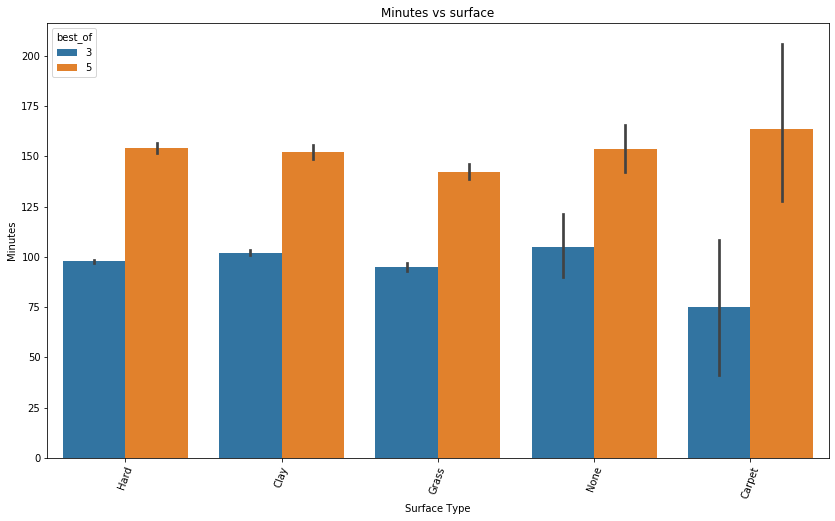

<Figure size 432x288 with 0 Axes>

In [8]:
plt.figure(figsize=(14,8))

plt.title('Minutes vs surface')
sns.barplot(x=df['surface'],y=df['minutes'],hue=df['best_of'])
plt.xlabel('Surface Type')
plt.ylabel('Minutes')
plt.xticks(rotation=70)
plt.savefig('Minutes_Surface.png',dpi=400)
plt.show()
plt.tight_layout()

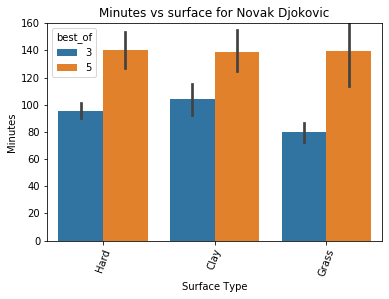

<Figure size 432x288 with 0 Axes>

In [26]:
dfplayer=df[df['winner_name']=='Novak Djokovic']
plt.title('Minutes vs surface for Novak Djokovic')
sns.barplot(x=dfplayer['surface'],y=dfplayer['minutes'],hue=dfplayer['best_of'])
plt.xlabel('Surface Type')
plt.ylabel('Minutes')
plt.xticks(rotation=70)
plt.ylim(0, 160)
plt.savefig('Minutes_Surface_Novak.png',dpi=400)
plt.show()
plt.tight_layout()

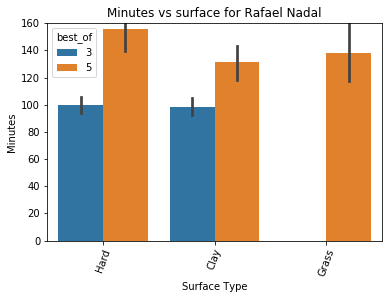

<Figure size 432x288 with 0 Axes>

In [27]:
dfplayer=df[df['winner_name']=='Rafael Nadal']
plt.title('Minutes vs surface for Rafael Nadal')
sns.barplot(x=dfplayer['surface'],y=dfplayer['minutes'],hue=dfplayer['best_of'])
plt.xlabel('Surface Type')
plt.ylabel('Minutes')
plt.xticks(rotation=70)
plt.ylim(0, 160)
plt.savefig('Minutes_Surface_Nadal.png',dpi=400)
plt.show()
plt.tight_layout()

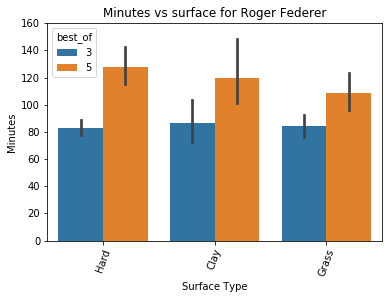

<Figure size 432x288 with 0 Axes>

In [28]:
dfplayer=df[df['winner_name']=='Roger Federer']
plt.title('Minutes vs surface for Roger Federer')
sns.barplot(x=dfplayer['surface'],y=dfplayer['minutes'],hue=dfplayer['best_of'])
plt.xlabel('Surface Type')
plt.ylabel('Minutes')
plt.xticks(rotation=70)
plt.ylim(0, 160)
plt.savefig('Minutes_Surface_Federer.png',dpi=400)
plt.show()
plt.tight_layout()

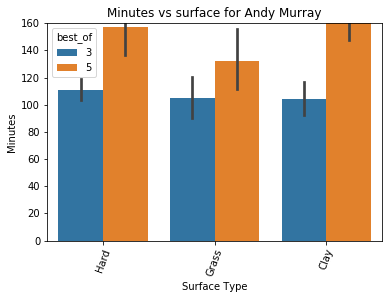

<Figure size 432x288 with 0 Axes>

In [29]:
dfplayer=df[df['winner_name']=='Andy Murray']
plt.title('Minutes vs surface for Andy Murray')
sns.barplot(x=dfplayer['surface'],y=dfplayer['minutes'],hue=dfplayer['best_of'])
plt.xlabel('Surface Type')
plt.ylabel('Minutes')
plt.xticks(rotation=70)
plt.ylim(0, 160)
plt.savefig('Minutes_Surface_Murray.png',dpi=400)
plt.show()
plt.tight_layout()